In [1]:
%matplotlib notebook
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [31]:
class Flock(object):
    """Represents the N-birds configuration at a given moment, in 2D. Birds are flocking in a square of side L
    with periodic boundary conditions. Birds' positions and velocities are contained in two arrays. 
    At t=0, these are pos0 and vel0.
    Birds flock will evolve at each time-step Dt"""
    
    def __init__(self,N,L,eta,v,r, Dt, pos0, vel0):
        """we choose L as a multiple of r in order to simplify"""
        self.positions = pos0
        self.velocities = vel0
        self.a = int(L/r)
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        self.eta = eta
        self.v = v
        self.r = r 
        """the interaction radius"""
        self.L = L 
        """the scale of the flock"""
        self.N = N
        self.Dt=Dt
        self.localize_birds()
        
    def localize_birds(self):
        """compute the cell of each bird from its position and actualize self.checkering"""
        for k in range (self.N):
            i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
            self.checkering[i][j].append(k)
        
    
    def compute_new_velocity(self, k):
        """compute the new velocity bird number k will adopt, according to the velocity of its neighbours.
        Neighbours are necessary contained in the cell of bird number k and the eight cells around.
        For each of these potential neighbours, we have to check if they are within a circle of radius r around bird number k
        the interaction radius"""
        i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
        cos_avr = 0
        sin_avr = 0
        for p in range(-1,2):
            for q in range (-1,2):
                for bird in self.checkering[(i+p)%self.a][(j+q)%self.a]:
                    if np.linalg.norm(self.positions[k]-self.positions[bird])<self.r : #check if birds are within a circle of radius r
                        cos_avr += self.velocities[bird,0]
                        sin_avr += self.velocities[bird,1]
        if cos_avr == 0 :
            theta=np.sign(sin_avr)*(np.pi)/2
        else :
            theta=np.arctan(sin_avr/cos_avr)
        theta+=npr.uniform(-self.eta/2,self.eta/2)
        new_velocity = self.v*np.array([np.cos(theta),np.sin(theta)])
        return new_velocity
    
    def make_step(self):
        """compute the new velocities and positions that birds will get after the time-step,
        actualize self.positions, self.velocities and self.chekering"""
        new_velocities=np.zeros((self.N,2))
        new_positions=(self.positions).copy()
        for k in range(N):
            new_velocities[k]=self.compute_new_velocity(k)
            new_positions[k]+=(self.velocities[k]*self.Dt)
            new_positions[k]=new_positions[k]%self.L #%L for periodic boundary conditions
        self.positions = new_positions
        self.localize_birds()
        self.velocities=new_velocities
        
    def compute_avr_norm_velocity(self):
        """compute the average normalized velocity of birds in the flock at time t"""
        va = [0,0]
        for k in range (self.N):
            va+=self.velocities[k]
        return np.linalg.norm(va/(self.N*v))
    
            

In [59]:
def flock_to_image(flock):
    plt.figure()
    plt.quiver(flock.positions[:,0],flock.positions[:,1],flock.velocities[:,0],flock.velocities[:,1], alpha=.5)
    plt.axis([0,flock.L,flock.L,0])
    plt.show()
    



[[ 9.21376984  3.51535166]
 [ 0.98070432  7.01068304]
 [ 6.63461963  7.0411554 ]
 [ 6.28712799  6.04899554]
 [ 9.91125314  6.84102091]
 [ 6.39615043  6.85206637]
 [ 8.1744862   9.33970714]
 [ 2.16499165  2.27652615]
 [ 8.92333693  0.53732288]
 [ 1.97516345  6.12882011]
 [ 4.95759027  8.62490172]
 [ 7.99653347  1.40349814]
 [ 7.59731969  5.37630805]
 [ 7.47356845  8.91482477]
 [ 1.20492477  3.09043135]
 [ 5.33118979  1.89171358]
 [ 4.66568283  4.272693  ]
 [ 2.01706538  2.55901938]
 [ 2.32595144  3.15258866]
 [ 4.4177277   2.6473567 ]
 [ 6.02765594  5.55277509]
 [ 9.13535031  9.15689112]
 [ 2.01623059  1.61149317]
 [ 6.12745677  0.22839204]
 [ 3.22166552  1.76411316]
 [ 3.93190543  5.53124442]
 [ 1.3248232   3.97523024]
 [ 4.34104196  2.53446764]
 [ 0.86382058  9.5057448 ]
 [ 1.49761855  1.66038112]
 [ 5.96325496  7.33719583]
 [ 8.54611396  3.02935958]
 [ 1.61620876  6.46446272]
 [ 1.95229398  4.60890078]
 [ 7.33767066  1.04732064]
 [ 7.95498187  6.71565726]
 [ 7.45465008  3.14918347]
 

<IPython.core.display.Javascript object>


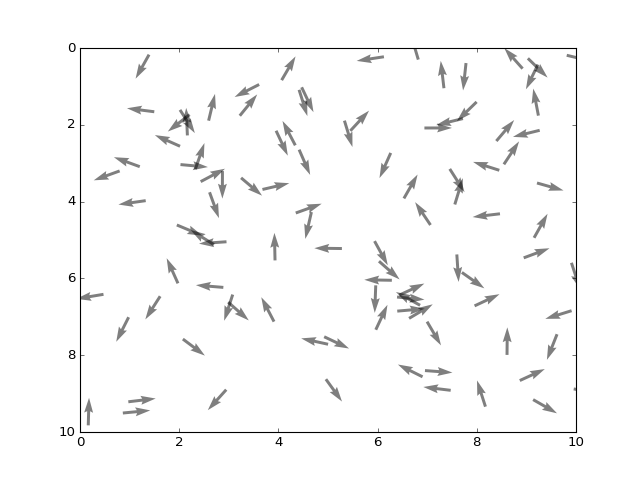

In [63]:
N=100
L=10
eta=0.1
v=1
r=0.5
Dt=1
#pos0=np.array([[5.,5.],[2.,3.],[3.,7.]])
pos0=npr.uniform(0,L,size=(N,2))
#vel0=np.array([[1.,0.],[0.5,0.],[1.,0.]])
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)
print(fl.positions)
flock_to_image(fl)

<IPython.core.display.Javascript object>


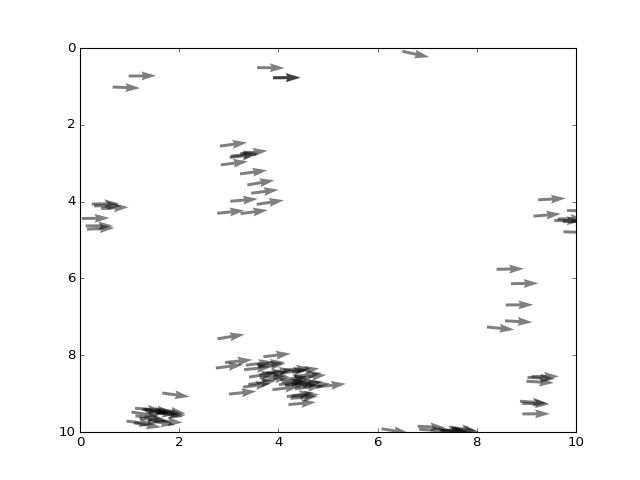

In [64]:
for i in range(100):
    fl.make_step()
flock_to_image(fl)




In [65]:

A=np.array([3,4])%1.6
print(A)

[ 1.4  0.8]


In [55]:
theta = npr.uniform(0.,2*np.pi,3)
vel0=np.zeros((3,2))
vel0[:,0]=np.cos(theta)
vel0[:,1]=np.sin(theta)
print (vel0)
print("pos",npr.uniform(0,L,size=(2,3)))


[[-0.99831402 -0.05804412]
 [ 0.82768129 -0.56119844]
 [-0.93764083  0.34760562]]
pos [[ 5.66801159  6.93057364  7.29564464]
 [ 4.14832035  8.11529092  1.9997211 ]]
